In [627]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [1]:
# Once the code is finished, it will be added to a2eipy (python library). 
# Hence, this block will eventually be thrown out from this Jupyter Notebook.

%load_ext autoreload
%run cooking_session.py
%run plot_resources.py
%run on_grid_resources.py

In [2]:
# Packages
from pylab import rcParams

In [3]:
# Source files
df_info = pd.read_csv('files/data_look_up_table.csv', sep=',' , index_col=False)  # Lookup list On-grid pilot
df_extended_info = pd.read_csv('files/on_grid_EPC_pilot_test.csv', sep=',' , index_col=False) # Survey
df_wab = pd.read_csv('files/whatsapp_data_fetched_on_Jan_12.csv', sep=',' , index_col=False) # WAB data
df_raw = pd.read_csv('files/ongridpilot_jan19.csv', sep=',' , index_col=False) # SM data On-grid pilot

In [4]:
# Overview of parameters that are possible to adjust
default_params = {'time_resolution': 5,
         't_between': 15,
         'energy_error_margin': 0.04,
         'min_size_of_spikes': 1,
         'minimum_energy_per_cooking_event': 0.05,
         'power_mean_min': 0.05,
         'minimum_event_current': 0.5,
         'max_cooking_time':300,
         'time_resolution': 5,
         'minimum_active_load': 0.15,
         'power_capacity': 1}

# Outputs
df_epc = preprocess_epc_data(df_raw, time_resolution=1, 
                             energy_error_margin=0,
                             minimum_energy_per_cooking_event=0.04,
                            minimum_event_current = 0,
                            minimum_active_load=0.05)

df_epc = combine_list_sm_data(df_epc, df_info)
# Only include meters that is part of household in tz_cooking_pilot_2
df_epc = df_epc[df_epc.name.isnull()==False]
# Only 5 customers
df_epc = df_epc[(df_epc.name == 'Abraham Molel')|
                (df_epc.name == 'Faudhia Hemed') |
               (df_epc.name == 'Jackline Anthony') |
               (df_epc.name == 'Joyce Mosha') |
               (df_epc.name == 'Judith Binamungu') ]

# Outputs
df_only_events = create_only_event_df(df_epc)
df_only_events = combine_list_sm_data(df_only_events, df_info)
df_only_events.reset_index(inplace=True)
df_epc = clean_data_set(df_epc)

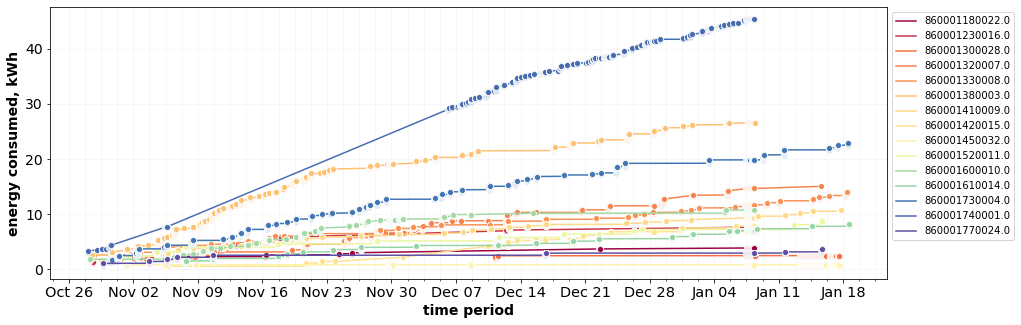

In [5]:
%matplotlib inline
plot_on_grid_pilot(df_epc)

In [6]:
df_only_events.describe()

,meter_number,energy,event_energy,power,cooking_time,current,no_recordings,id,power_mean,cooking_cost,event_count,sm_energy_total
count,4.430000e+02,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000
mean,8.600015e+07,11.976953,0.245485,0.761122,21.458691,4.857211,9.835214,467.388262,0.794088,24.548533,222.000000,17.679428
std,1.801451e+01,11.039583,0.135630,0.334091,14.145648,1.667534,9.642592,6.468374,0.310415,13.563023,128.027341,11.704552
min,8.600012e+07,0.740000,0.040000,0.000000,3.000000,3.245000,2.000000,460.000000,0.080000,4.000000,1.000000,0.000000
25%,8.600013e+07,4.325000,0.150000,0.580462,10.000000,3.819000,4.000000,463.000000,0.600000,15.000000,111.500000,8.670000
50%,8.600014e+07,7.990000,0.230000,0.711829,20.000000,4.037000,6.000000,465.000000,0.750000,23.000000,222.000000,12.590000
75%,8.600017e+07,15.055000,0.305000,0.852141,28.000000,7.027000,11.000000,471.000000,0.903947,30.500000,332.500000,24.543333
max,8.600018e+07,45.290000,1.150000,1.869332,130.000000,8.184000,64.000000,492.000000,1.800000,115.000000,443.000000,41.990000


In [7]:
print('No. of cooking events: '+str(df_only_events.event_count.nunique()))

No. of cooking events: 443


In [8]:
df_epc.reset_index(inplace=True)

In [9]:
device_stats(df_epc, df_only_events)

,event_count,no_of_meters,total_event_energy,max_current,events/meter,energy/meter,average_event_energy,average_cooking_time
device,,,,,,,,
EPC,245,5,66.120000,4.345,49.0,13.224000,0.269878,25.493878
Hot plate,4,2,0.790000,6.151,2.0,0.395000,0.197500,26.000000
Kettle,112,4,21.436667,8.184,28.0,5.359167,0.191399,10.332143
Rice cooker,82,4,20.403333,4.291,20.5,5.100833,0.248821,24.378049


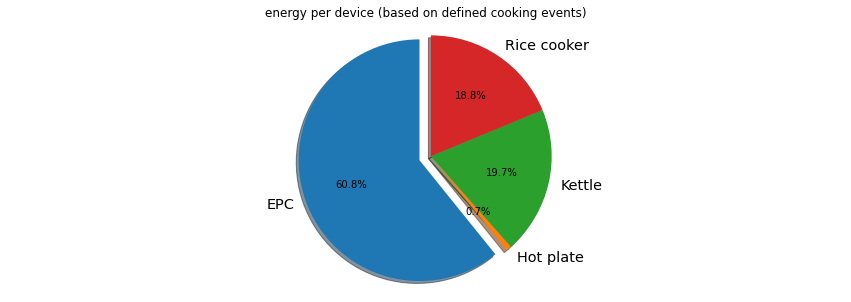

In [10]:
title = 'energy per device (based on defined cooking events)'
sizes = df_only_events.groupby([df_only_events.device]).agg({'event_energy':'sum'}).event_energy
pie_chart(df_only_events, sizes, title, None)

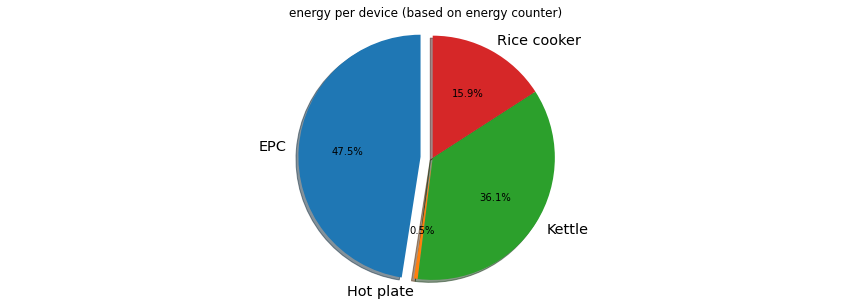

In [11]:
sizes = df_epc.groupby('meter_number').first().groupby('device').agg({'sm_energy_total':'sum'}).sm_energy_total
title = 'energy per device (based on energy counter)'
pie_chart(df_epc, sizes, title,save_path='images/pie_energy_counter.png')

In [12]:
df_only_events_name = df_only_events.groupby('name').agg({'event_energy':'mean', 'cooking_time':'mean','event_count':'nunique', 'device':'unique'})
df_only_events_name.rename(
    columns={'event_energy': 'average_event_energy',
        'cooking_time': 'average_cooking_time'},
    inplace=True)
df_only_events_name

,average_event_energy,average_cooking_time,event_count,device
name,,,,
Abraham Molel,0.232312,20.497297,111,"[EPC, Rice cooker, Kettle]"
Faudhia Hemed,0.219598,18.870690,116,"[EPC, Hot plate, Kettle]"
Jackline Anthony,0.255036,19.336957,92,"[Kettle, EPC, Rice cooker]"
Joyce Mosha,0.332482,28.042553,47,"[Kettle, Hot plate, EPC, Rice cooker]"
Judith Binamungu,0.238961,25.259740,77,"[EPC, Rice cooker]"


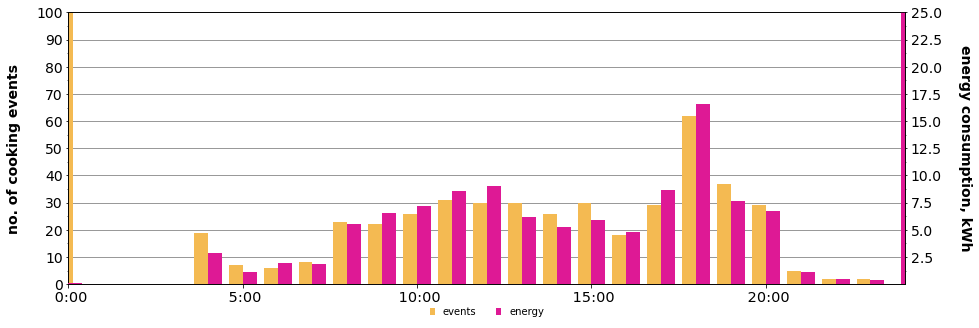

In [13]:
day_plot(df_only_events)

In [14]:
# Simple day plot: 
# df_only_events.groupby([(df_only_events.timestamp.dt.hour)]).agg({'event_energy':'sum'}).event_energy.plot()
# plt.show()

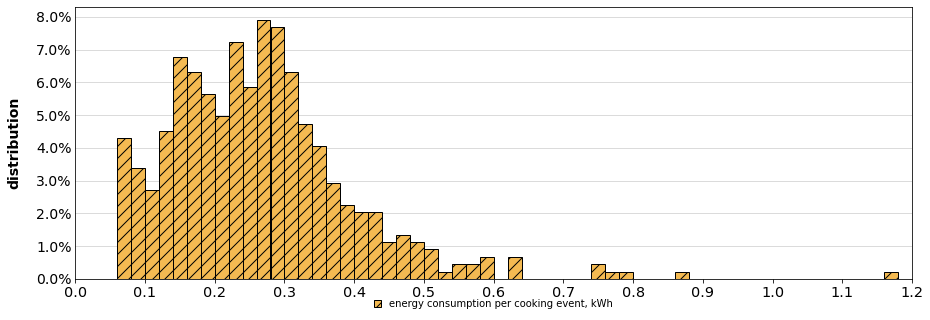

In [15]:
distr_plot(df_only_events)

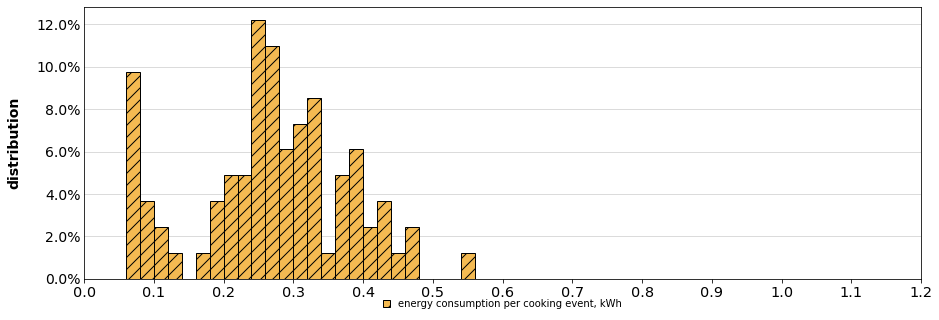

In [16]:
df_only_events_rice = df_only_events[df_only_events.device=='Rice cooker']
distr_plot(df_only_events_rice)

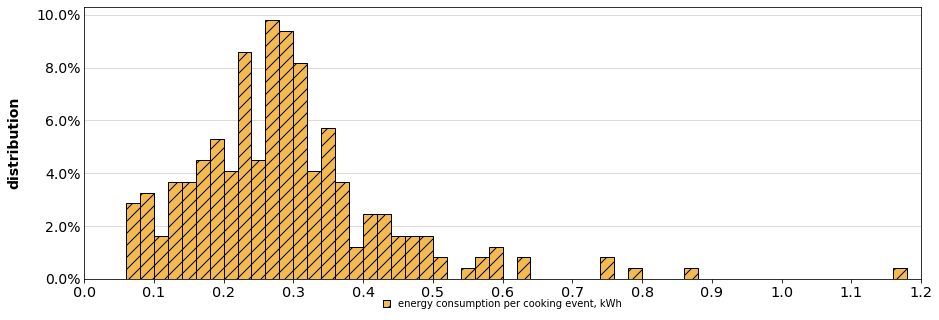

In [17]:
df_only_events_epc = df_only_events[df_only_events.device=='EPC']
distr_plot(df_only_events_epc)

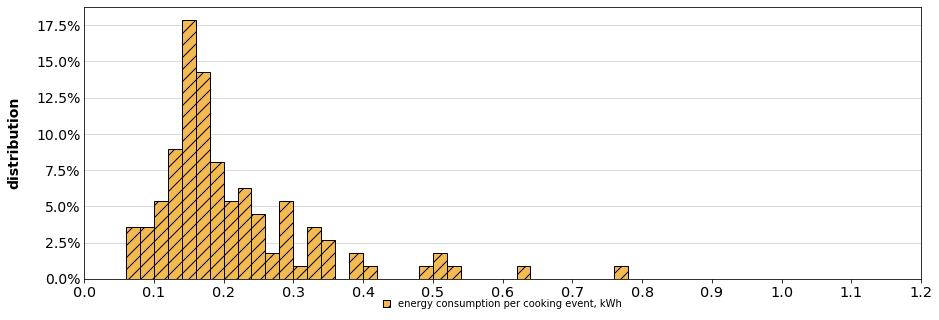

In [18]:
df_only_events_kettle = df_only_events[df_only_events.device=='Kettle']
distr_plot(df_only_events_kettle)

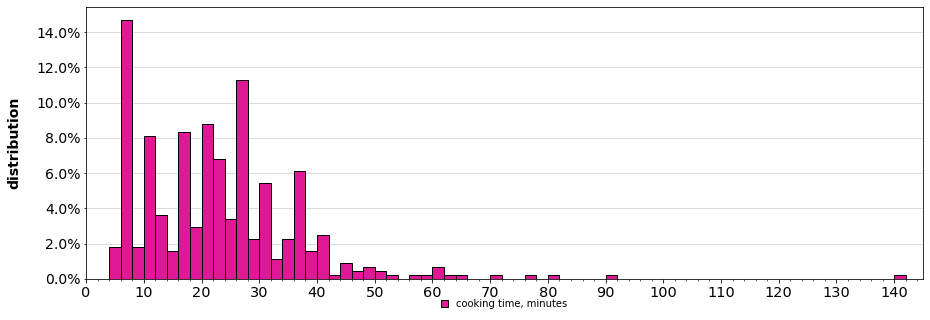

In [19]:
distr_plot_time(df_only_events)

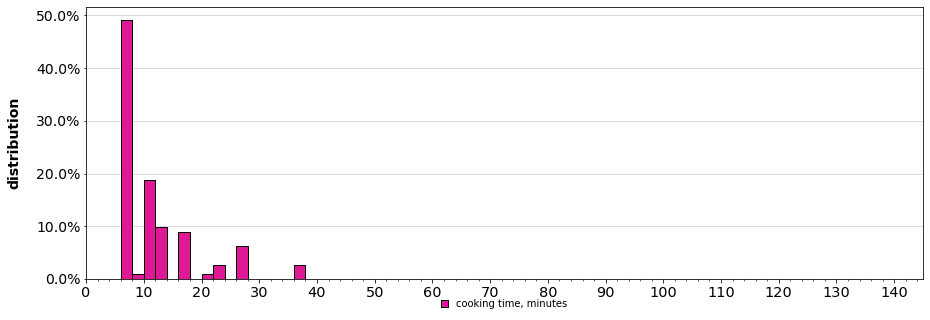

In [20]:
distr_plot_time(df_only_events_kettle)

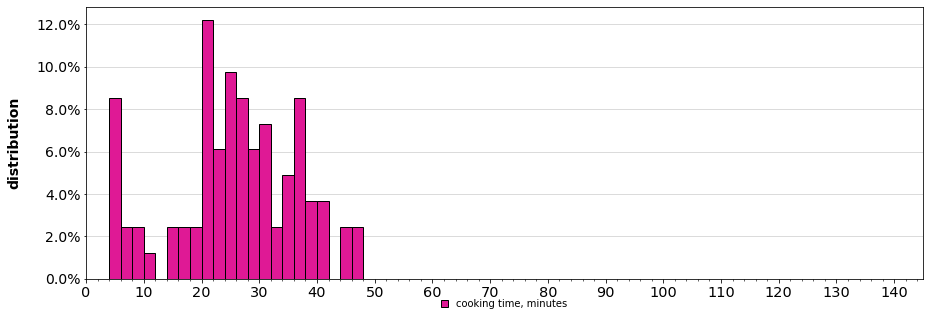

In [21]:
distr_plot_time(df_only_events_rice)

In [22]:
# Change the Width and Height of the following graphs
plt.rcParams['figure.figsize'] = [14, 5]

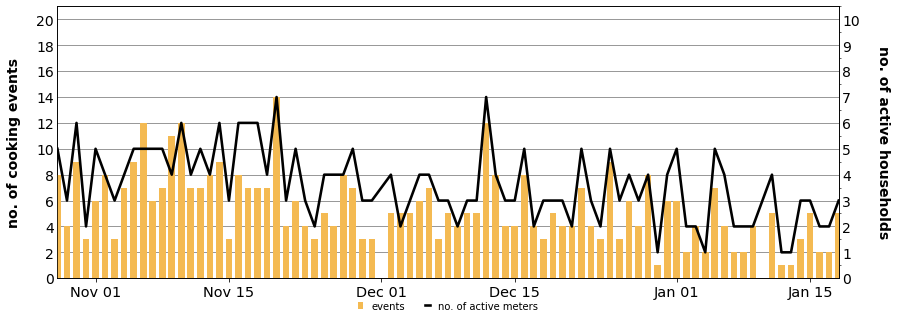

In [23]:
df_day = df_only_events.groupby(df_only_events.timestamp.dt.date).agg({'event_count':'nunique', 'event_energy':'sum', 'meter_number':'nunique'})
classic_graph(df_day)

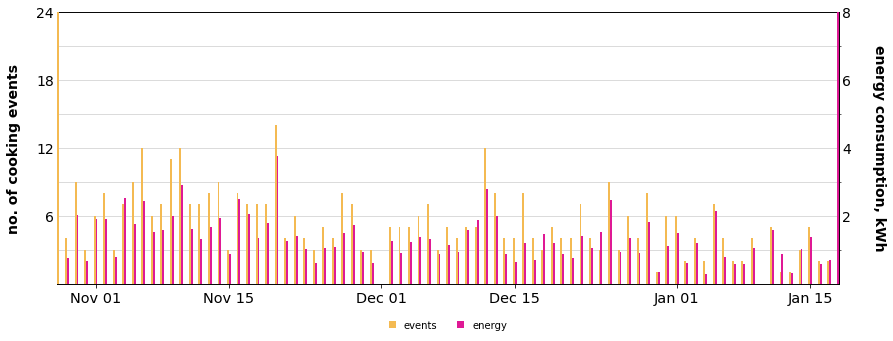

In [24]:
df_day = df_only_events.groupby(df_only_events.timestamp.dt.date).agg({'event_count':'nunique', 'event_energy':'sum', 'meter_number':'nunique'})
energy_and_time_plot(df_day)

In [ ]:
# Simple plots of week and month
'''
df_only_events.groupby((df_only_events.timestamp.dt.isocalendar().week)).agg({'event_energy':'sum'}).event_energy.plot()
plt.title('Energy per week')
plt.show()

df_only_events.groupby(([df_only_events.timestamp.dt.month])).agg({'event_energy':'sum'}).event_energy.plot(marker='o')
plt.title('Energy per month')
plt.show()
'''

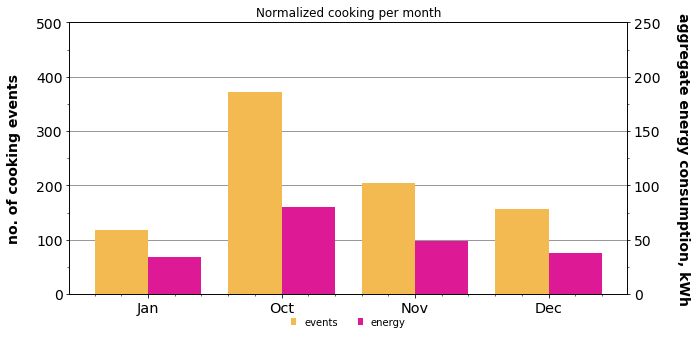

In [26]:
# Width and Height of following graph
plt.rcParams['figure.figsize'] = [10, 5]

df_month = df_only_events.groupby(df_only_events.timestamp.dt.month).agg({'event_count':'nunique', 'event_energy':'sum', 'meter_number':'nunique'})
norm_month_time = {1:15/31,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1,10:2/31,11:1,12:1}

month_plot(df_month, norm_month_time)

## Quantiles

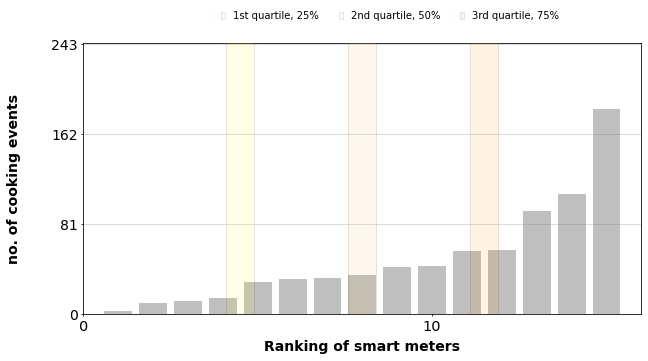

In [27]:
# Width and Height of following graph
plt.rcParams['figure.figsize'] = [10, 5]

quantiles_plot(df_only_events, event_basis='yes')

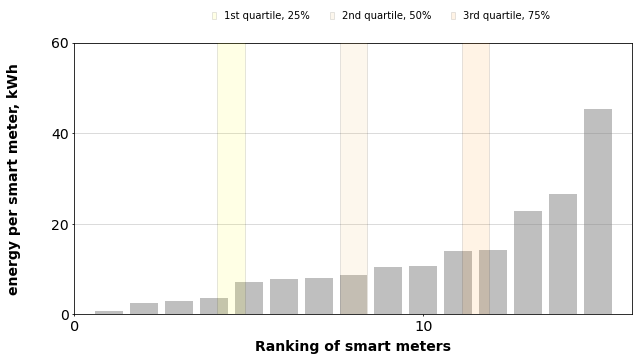

In [28]:
# Width and Height of following graph
plt.rcParams['figure.figsize'] = [10, 5]

quantiles_plot(df_only_events, event_basis='no')